In [2]:
import numpy as np
from scipy.sparse import csr_matrix
from paralleltomo import paralleltomo
from PIL import Image
import matplotlib.pyplot as plt
import math

/Users/karlfindhansen/Documents/GitHub/MathModellingDTU/Exam Project/paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


In [3]:
path = "/Users/karlfindhansen/Desktop/MathModellingDTU/Exam Project/testImage.npy"

(5000, 5000)


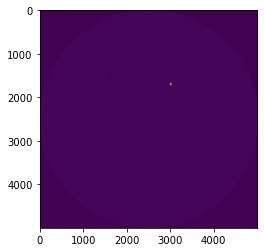

In [4]:
im = np.load(path)
print(im.shape)

plt.imshow(im)
plt.show()

In [5]:
N=8
theta = np.matrix([45.0000,   67.5000,   90.0000,  112.5000,  135.0000,  157.5000,  180.0000,  202.5000,  225.0000,  247.5000,  270.0000, 292.5000,  315.0000])
[A,theta,p,d] = paralleltomo(N,theta,11)

# print([A,theta,p,d])
print(f"A = {A}")
print(np.linalg.matrix_rank(A),A.shape[0])
print()

N=200
theta =np.matrix(np.linspace(0,179,179))
p = 250
[A,theta,p,d] = paralleltomo(N,theta,p)
print(f"A = {A}")
# print([A,theta,p,d])

A = [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.13137085 0.         0.        ]
 [0.         0.         0.         ... 0.         0.84852814 0.56568542]
 [0.         0.         0.         ... 0.         0.         0.        ]]
63 143



/Users/karlfindhansen/Documents/GitHub/MathModellingDTU/Exam Project/paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


A = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Problem 1

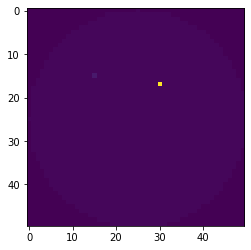

In [6]:
# make the resolution of im to 50 x 50
resized_im = im[::100,::100]
plt.imshow(resized_im)  
plt.show()

#save resized im
np.save('resized_im', resized_im)

In [7]:
# calculating the A matrix
N = 50
p = 50
theta = np.matrix(np.linspace(0,179,179))
[A,theta,p,d] = paralleltomo(N, theta, p)
print(np.linalg.matrix_rank(A),A.shape)

print(f"A = {A}")

2500 (8950, 2500)
A = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Simulating forward projection

In [8]:
def calculatingB(A, resized_im):
    x = np.ravel(resized_im)
    b = np.matmul(A,x)
    return b

b = calculatingB(A, resized_im)
# x with no noise
x_no_Noise = np.linalg.lstsq(A, b)[0]
resized_no_noise_im = np.resize(x_no_Noise, (50,50))
np.save("x_no_noise.npy", resized_no_noise_im)

# adding noise from mean and stanard deviation
def addNoise(b):
    mean = np.mean(b)
    std = np.std(b)
    noise = np.random.normal(mean, std, b.shape)
    noisy_b = b + noise
    return noisy_b

noisy_b = addNoise(b)
x_noisy = np.linalg.lstsq(A, noisy_b)[0]
resized_noise_im = np.resize(x_noisy, (50,50))
np.save("x_with_noise.npy", resized_noise_im)



/var/folders/r2/gzlv5h7s47398gkvjzzqmmfr0000gn/T/ipykernel_9591/2641152074.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_no_Noise = np.linalg.lstsq(A, b)[0]
/var/folders/r2/gzlv5h7s47398gkvjzzqmmfr0000gn/T/ipykernel_9591/2641152074.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_noisy = np.linalg.lstsq(A, noisy_b)[0]


# Comparing images

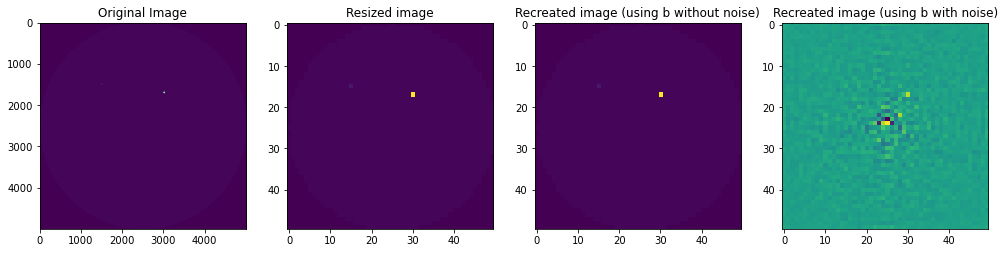

In [9]:
# make a subplot of the three images

original_image = np.load("testImage.npy")
resized_im = np.load("resized_im.npy")
x_no_Noise = np.load("x_no_noise.npy")
x_noisy = np.load("x_with_noise.npy")

# make subplot of the 4 images
def subplot(original_image, resized_im, x_no_Noise, x_noisy):
    fig, axs = plt.subplots(1, 4, figsize=(17, 17))
    axs[0].imshow(original_image)
    axs[0].set_title("Original Image")
    axs[1].imshow(resized_im)
    axs[1].set_title("Resized image")
    axs[2].imshow(x_no_Noise)
    axs[2].set_title("Recreated image (using b without noise)")
    axs[3].imshow(x_noisy)
    axs[3].set_title("Recreated image (using b with noise)")
    plt.show()


subplot(original_image, resized_im, x_no_Noise, x_noisy)

# Energies and Resolution
Here it is investegated what x-ray energy is best for the system?

The attenuation of a material is the the measurement of energy absorbed and deflected as it passes through a medium. 

## This part is not done yet

In [79]:
log_size = 0.5 # m

thinkness = N/log_size #m

I0 = [i for i in range(10,210,10)] # keV

x = np.ravel(resized_im) # attenuation coefficients

# plt.plot([i for i in range(len(x))], x)
attenuation_steel = max(x) # max value of the attenuation coefficient
# second max value
attenuation_lead = max([i for i in x if i != attenuation_steel])
# attenuation wood within the range of a standard deviation of the mean
attenuation_wood = np.mean([i for i in x if (i < np.mean(x)+2*np.std(x) and i > 0)])

print(f'Attenation steel = {attenuation_steel}')
print(f'Attenation lead = {attenuation_lead}')
print(f'Attenation wood = {attenuation_wood}')

# sort out the energy values for lead and bismuth

thickness = [thinkness for _ in range(len(x))] # thickness of the material

def calculate_energy(I0, x, l): #this function estimates the x-ray intensity for all different energies
    s = 0
    I = []
    for j in range(len(x)):
        s += x[j]*l[j]
    for i in range(len(I0)):
        I.append(I0[i] * np.exp(-s))
    return I

I = calculate_energy(I0, x, thickness)

# plt.plot(I0, I)
# plt.title("Intensity of the x-rays")
# plt.xlabel("Energy [keV]")
# plt.ylabel("Intensity [keV]")
# plt.show()

# def calculate_attenuation_coefficients(I0, x, thickness): # this function calculates the attenuation coefficients aka b
#     I = calculate_energy(I0, x, thickness)
#     b = []
#     for i in range(len(I0)):
#         b.append(np.log(I0[i]/I[i]))
#     return b

# b = calculate_attenuation_coefficients(I0, x, thickness)
# check if the b values are identical

# print(energy_lead)
# print(energy_bismuth)
    

    

Attenation steel = 0.05397851616202787
Attenation lead = 0.0037101005066195736
Attenation wood = 0.0008496388523324683


# Part 2